## Class namespaces

In [1]:
class Vehicle():
    n_wheels = 4
    current_speed = 0.0

car = Vehicle()
bike = Vehicle()
bike.n_wheels = 2

print("Car Wheels: " + str(car.n_wheels))
print("Bike Wheels: " + str(bike.n_wheels))

# Namespaces betrachten
print("Car Dict: " + str(car.__dict__))
print("Bike Dict: " + str(bike.__dict__))

Car Wheels: 4
Bike Wheels: 2
Car Dict: {}
Bike Dict: {'n_wheels': 2}


In [2]:
Vehicle.n_wheels = 2 # alle Fahrzeuge haben jetzt 2 Räder
print("Car Wheels: " + str(car.n_wheels))
print("Bike Wheels: " + str(bike.n_wheels))
Vehicle.n_wheels = 4 # zurücksetzen

Car Wheels: 2
Bike Wheels: 2


In [3]:
class Vehicle():
    def __init__(self, n_wheels=4, current_speed=0.0):
        self.n_wheels = n_wheels
        self.current_speed = current_speed

# Objekte erzeugen
car = Vehicle()
bike = Vehicle(n_wheels=2)

print("Car Wheels: " + str(car.n_wheels))
print("Bike Wheels: " + str(bike.n_wheels))

# Namespaces betrachten
print("Car Dict: " + str(car.__dict__))
print("Bike Dict: " + str(bike.__dict__))

Car Wheels: 4
Bike Wheels: 2
Car Dict: {'n_wheels': 4, 'current_speed': 0.0}
Bike Dict: {'n_wheels': 2, 'current_speed': 0.0}


## Class decorators

In [4]:
# PKW-Klasse erneut definieren
class Car():
    def __init__(self, color, use_type):
        self.color = color
        self.use_type = use_type
    
    @property
    def description(self):
        return self.color + " " + self.use_type

In [5]:
# erneut ein PKW-Objekt erzeugen
my_car = Car("blue", "family car")
# Attribute des Objekts anzeigen und Methode ausführen
print("Color:", my_car.color)
print("Use Type:", my_car.use_type)
print("Description:", my_car.description)

Color: blue
Use Type: family car
Description: blue family car


In [6]:
# das Farb-Attribut ändern
my_car.color = "pink"
# Attribute des Objekts anzeigen und Methode ausführen
print("Color:", my_car.color)
print("Use Type:", my_car.use_type)
print("Description:", my_car.description)

Color: pink
Use Type: family car
Description: pink family car


In [7]:
# Versuch, das zusammengesetzte Attribut zu ändern
#my_car.description = "ocher van"
# AttributeError: property 'description' of 'Car' object has no setter

In [8]:
# PKW-Klasse erneut definieren
class Car():
    def __init__(self, color, use_type):
        self.color = color
        self.use_type = use_type
    
    @property
    def description(self):
        return self.color + " " + self.use_type
    
    # eine Setter-Methode zur Änderung von Attributen
    # auf Basis der Beschreibung definieren
    @description.setter
    def description(self, desc):
        color, use_type = desc.split(" ")
        self.color = color
        self.use_type = use_type

In [9]:
# erneut ein PKW-Objekt erzeugen
my_car = Car("blue", "family car")
# die Beschreibung ändern
my_car.description = "ocher van"
# Attribute anzeigen
print("Color:", my_car.color)
print("Use Type:", my_car.use_type)
print("Description:", my_car.description)

Color: ocher
Use Type: van
Description: ocher van


## Vererbung
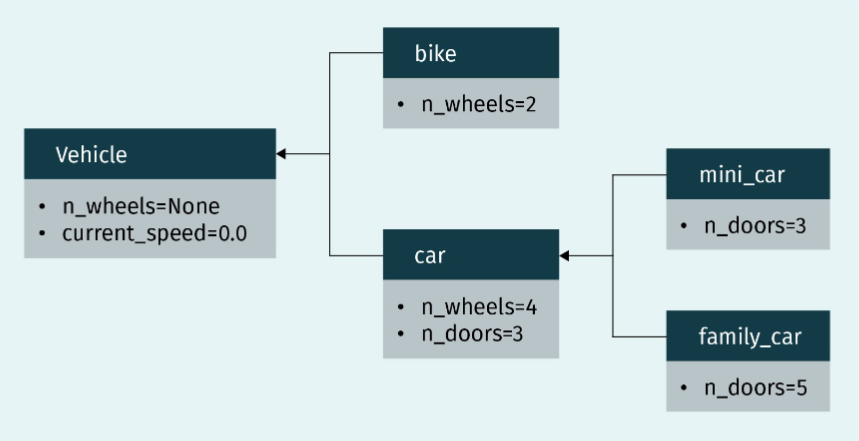

In [10]:
# Eine Sub-Klasse mit angepassten Attributen anlegen
class Car(Vehicle):
    # Konstruktor-Methode definieren
    def __init__(self, n_wheels=4, current_speed=0.0, n_doors=3):
        # Konstruktor-Methode der Elternklasse ausführen
        Vehicle.__init__(self, n_wheels, current_speed)
        # angepasste Konstruktor-Methode der Kind-Klasse ausführen
        self.n_doors = n_doors

# Instanzen der Subklasse erzeugen
mini_car = Car()
family_car = Car(n_doors=5)

# vererbte und angepasste Attribute betrachten
print("Mini-Car - Anzahl Räder:", mini_car.n_wheels)
print("Mini-Car - Momentane Geschwindigkeit:", mini_car.current_speed)
print("Mini-Car - Anzahl Türen:", mini_car.n_doors)
print("Familiy-Car - Anzahl Räder:", family_car.n_wheels)
print("Familiy-Car - Momentane Geschwindigkeit:", family_car.current_speed)
print("Familiy-Car - Anzahl Türen:", family_car.n_doors)

Mini-Car - Anzahl Räder: 4
Mini-Car - Momentane Geschwindigkeit: 0.0
Mini-Car - Anzahl Türen: 3
Familiy-Car - Anzahl Räder: 4
Familiy-Car - Momentane Geschwindigkeit: 0.0
Familiy-Car - Anzahl Türen: 5


In [11]:
help(mini_car)

Help on Car in module __main__ object:

class Car(Vehicle)
 |  Car(n_wheels=4, current_speed=0.0, n_doors=3)
 |  
 |  Method resolution order:
 |      Car
 |      Vehicle
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n_wheels=4, current_speed=0.0, n_doors=3)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Vehicle:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [12]:
# überprüfen, ob ein Objekt eine Instanz einer Klasse ist
print(isinstance(mini_car, Car))
print(isinstance(mini_car, Vehicle))
# überprüfen, ob eine Klasse ein Kind einer Eltern-Klasse ist
print(issubclass(Car, Vehicle))

True
True
True


## Methodenüberschreibung

In [13]:
# Eltern-Klasse definieren
class Vehicle():
    # Konstruktor zur Generierung von Attributen
    def __init__(self, current_speed=0.0):
        self.current_speed = current_speed

    # Methode zur Beschleunigung hinzufügen
    def increase_speed(self, increment=5.0):
        self.current_speed += increment

# Kind-Klasse definieren
class Car(Vehicle):
    # Methoden-Überschreibung
    def increase_speed(self, increment=10.0):
        self.current_speed += increment

# eine weitere Kind-Klasse definieren
class Bike(Vehicle):
    # Methoden-Überschreibung
    def increase_speed(self, increment=2.0):
        self.current_speed += increment

In [14]:
# zwei Objekte auf Basis der beiden Subklassen generieren
my_car = Car()
my_bike = Bike()

# beide Objekte 7-fach beschleunigen
for i in range(7):
    my_car.increase_speed()
    my_bike.increase_speed()

# aktuelle Geschwindigkeiten ausgeben
print("PKW-Geschwindigkeit:", my_car.current_speed)
print("Fahrrad-Geschwindigkeit:", my_bike.current_speed)

PKW-Geschwindigkeit: 70.0
Fahrrad-Geschwindigkeit: 14.0


## Öffentliche, private und geschützte Attribute

In [15]:
# eine Fahrzeug-Klasse definieren
class Vehicle():
    # Attribute per Konstruktor anlegen
    def __init__(self, n_wheels=4, increment=10, type="car"):
        # ein "öffentliches" Attribut anlegen
        self.n_wheels = n_wheels
        # ein "privates" Attribut anlegen
        self._increment = increment
        # ein "geschütztes" Attribut anlegen
        self.__type = type
    # Setter für "geschütztes" Attribut definieren
    def setType(self, type):
        self.__type = type
    
    # Getter für "geschütztes" Attribut definieren
    def getType(self):
        print(self.__type)

# eine Instanz der Klasse erzeugen
my_car = Vehicle()

# auf "geschütztes" Attribut zugreifen
my_car.getType()

car
